In [1]:
import  math
import numpy as np
import lhapdf 
import matplotlib as mpl
from matplotlib import rc,gridspec
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import yoda

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [2]:
datadir="/Users/johannes/Dropbox/lh_2017_NNLO_COMP_Bellm/data/"



datadir="/Users/johannes/Dropbox/lh_2017_NNLO_COMP_Bellm/data/"

Sherpa_MEPSatNLO=yoda.readYODA(datadir+"Sherpa/Jets/nlops.yoda")
Sherpa_PSatLO=yoda.readYODA(datadir+"Sherpa/Jets/nlops.yoda")

H7_NLO_PS=yoda.readYODA(datadir+"Herwig/Jets/NLOPS_C_HtHat_shhalf.yoda")
H7_LO_PS=yoda.readYODA(datadir+"Herwig/Jets/LOPS_C_HtHat_shhalf.yoda")

NNLOJET_LO=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_LO.yoda")
NNLOJET_NLO=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NLO.yoda")
NNLOJET_NNLO=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NNLO.yoda")

POWHEG=yoda.readYODA(datadir+"POWHEG/JJ/incl.yoda")



In [5]:
xxx=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
xxx=[7,12,16,20,25,32,40]

xxx=range(0,30,2)

def rebin(yo,name):    
    
    a=np.array(yo[name].yVals())[0:30]
    xmaxs=np.array(yo[name].xMaxs())[0:30]
    xmins=np.array(yo[name].xMins())[0:30]
    
    res=[sum((a*(xmaxs-xmins))[xxx[0]:xxx[1]])/(xmaxs[xxx[1]]-xmins[xxx[0]])]
    for i in range(1,len(xxx)-1):
        res+=[sum((a*(xmaxs-xmins))[xxx[i-1]:xxx[i]])/(xmaxs[xxx[i]]-xmins[xxx[i-1]]),
              sum((a*(xmaxs-xmins))[xxx[i]:xxx[i+1]])/(xmaxs[xxx[i+1]]-xmins[xxx[i]])]
    res+=[sum((a*(xmaxs-xmins))[xxx[-2]:xxx[-1]])/(xmaxs[xxx[-1]]-xmins[xxx[-2]]),
          sum((a*(xmaxs-xmins))[xxx[-1]:])/(xmaxs[xxx[-1]]-xmins[-1]),
          sum((a*(xmaxs-xmins))[xxx[-1]:])/(xmaxs[xxx[-1]]-xmins[-1])]
    
    return np.array(res)


def rebinx(yo,name):
    a=np.array(yo[name].xVals())[0:30]
    res=[a[xxx[0]]]
    for i in range(1,len(xxx)):
        res+=[a[xxx[i]],a[xxx[i]]]
    res+=[a[-1]]
    return np.array(res)
    
def ratioPLOTS_leadJet(FO,Matching,Merging,ax,fo_rescale,ratioto):
    x  =rebinx(FO,'/CMS_RAD/d01-x01-y01-AK%s'%3)
    y03=rebin(FO,'/CMS_RAD/d01-x01-y01-AK%s'%3)
    y04=rebin(FO,'/CMS_RAD/d01-x01-y01-AK%s'%4)
    y07=rebin(FO,'/CMS_RAD/d01-x01-y01-AK%s'%7)
    y10=rebin(FO,'/CMS_RAD/d01-x01-y01-AK%s'%10)

    y03_h7=rebin(Matching,'/CMS_RAD/d01-x01-y01-AK%s'%3)
    y04_h7=rebin(Matching,'/CMS_RAD/d01-x01-y01-AK%s'%4)
    y07_h7=rebin(Matching,'/CMS_RAD/d01-x01-y01-AK%s'%7)
    y10_h7=rebin(Matching,'/CMS_RAD/d01-x01-y01-AK%s'%10)

    y03_sh=rebin(Merging,'/CMS_RAD/d01-x01-y01-AK%s'%3)
    y04_sh=rebin(Merging,'/CMS_RAD/d01-x01-y01-AK%s'%4)
    y07_sh=rebin(Merging,'/CMS_RAD/d01-x01-y01-AK%s'%7)
    y10_sh=rebin(Merging,'/CMS_RAD/d01-x01-y01-AK%s'%10)
    
    y03_pow=rebin(POWHEG,'/CMS_RAD/d01-x01-y01-AK%s'%3)
    y04_pow=rebin(POWHEG,'/CMS_RAD/d01-x01-y01-AK%s'%4)
    y07_pow=rebin(POWHEG,'/CMS_RAD/d01-x01-y01-AK%s'%7)
    y10_pow=rebin(POWHEG,'/CMS_RAD/d01-x01-y01-AK%s'%10)
    
    
    
    
    if ratioToR07==True : 
        ratioto=y07
        fo_rescale=1.
    ax.set_xlim([100,1330])
    ax.set_ylim([0.7,1.3])
    #ax.plot(x,y03*fo_rescale/ratioto,c="red",ls="-")
    ax.plot(x,y04*fo_rescale/ratioto,c="red",ls="--")
    ax.plot(x,y07*fo_rescale/ratioto,c="red",ls="-.")
    ax.plot(x,y10*fo_rescale/ratioto,c="red",ls=":")

    if ratioToR07==True : ratioto=y07_h7
    #ax.plot(x,y03_h7/ratioto,c="blue",ls="-")
    ax.plot(x,y04_h7/ratioto,c="blue",ls="--")
    ax.plot(x,y07_h7/ratioto,c="blue",ls="-.")
    ax.plot(x,y10_h7/ratioto,c="blue",ls=":")

    if ratioToR07==True : ratioto=y07_sh
    #ax.plot(x,y03_sh/ratioto,c="green",ls="-")
    ax.plot(x,y04_sh/ratioto,c="green",ls="--")
    ax.plot(x,y07_sh/ratioto,c="green",ls="-.")
    ax.plot(x,y10_sh/ratioto,c="green",ls=":")
    
    if ratioToR07==True : ratioto=y07_pow
    #ax.plot(x,y03_sh/ratioto,c="green",ls="-")
    ax.plot(x,y04_pow/ratioto,c="teal",ls="--")
    ax.plot(x,y07_pow/ratioto,c="teal",ls="-.")
    ax.plot(x,y10_pow/ratioto,c="teal",ls=":")
    
    
    
    

def dummyForLegend(FO,Matching,Merging,ax):
    x  =rebinx(FO,'/CMS_RAD/d01-x01-y01-AK%s'%3)
    y03=rebin(FO,'/CMS_RAD/d01-x01-y01-AK%s'%3)
    y04=rebin(FO,'/CMS_RAD/d01-x01-y01-AK%s'%4)
    y07=rebin(FO,'/CMS_RAD/d01-x01-y01-AK%s'%7)
    y10=rebin(FO,'/CMS_RAD/d01-x01-y01-AK%s'%10)

    y03_h7=rebin(Matching,'/CMS_RAD/d01-x01-y01-AK%s'%3)
    y04_h7=rebin(Matching,'/CMS_RAD/d01-x01-y01-AK%s'%4)
    y07_h7=rebin(Matching,'/CMS_RAD/d01-x01-y01-AK%s'%7)
    y10_h7=rebin(Matching,'/CMS_RAD/d01-x01-y01-AK%s'%10)

    y03_sh=rebin(Merging,'/CMS_RAD/d01-x01-y01-AK%s'%3)
    y04_sh=rebin(Merging,'/CMS_RAD/d01-x01-y01-AK%s'%4)
    y07_sh=rebin(Merging,'/CMS_RAD/d01-x01-y01-AK%s'%7)
    y10_sh=rebin(Merging,'/CMS_RAD/d01-x01-y01-AK%s'%10)
    
    y03_pow=rebin(POWHEG,'/CMS_RAD/d01-x01-y01-AK%s'%3)
    y04_pow=rebin(POWHEG,'/CMS_RAD/d01-x01-y01-AK%s'%4)
    y07_pow=rebin(POWHEG,'/CMS_RAD/d01-x01-y01-AK%s'%7)
    y10_pow=rebin(POWHEG,'/CMS_RAD/d01-x01-y01-AK%s'%10)

    #plt.semilogx()
    
    ratioto=1.
    
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    #ax.plot(x,y03/ratioto,c="red",ls="-",label="FO R=0.3")
    ax.plot(x,y04/ratioto,c="red",ls="--",label="FO R=0.4")
    ax.plot(x,y07/ratioto,c="red",ls="-.",label="FO R=0.7")
    ax.plot(x,y10/ratioto,c="red",ls=":",label="FO R=1.0")

    #ax.plot(x,y03_h7/ratioto,c="blue",ls="-",label="H7 NLO $\oplus$ PS R=0.3")
    ax.plot(x,y04_h7/ratioto,c="blue",ls="--",label="NLO $\oplus$ PS (Herwig7) R=0.4")
    ax.plot(x,y07_h7/ratioto,c="blue",ls="-.",label="NLO $\oplus$ PS (Herwig7) R=0.7")
    ax.plot(x,y10_h7/ratioto,c="blue",ls=":",label="NLO $\oplus$ PS (Herwig7) R=1.0")

    #ax.plot(x,y03_sh/ratioto,c="green",ls="-",label="Sherpa MEPS@NLO R=0.3")
    ax.plot(x,y04_sh/ratioto,c="green",ls="--",label="S-MC@NLO (Sherpa) R=0.4")
    ax.plot(x,y07_sh/ratioto,c="green",ls="-.",label="S-MC@NLO (Sherpa) R=0.7")
    ax.plot(x,y10_sh/ratioto,c="green",ls=":",label="S-MC@NLO (Sherpa) R=1.0")
    
    
    #ax.plot(x,y03_sh/ratioto,c="green",ls="-",label="Sherpa MEPS@NLO R=0.3")
    ax.plot(x,y04_sh/ratioto,c="teal",ls="--",label="POWHEG R=0.4")
    ax.plot(x,y07_sh/ratioto,c="teal",ls="-.",label="POWHEG R=0.7")
    ax.plot(x,y10_sh/ratioto,c="teal",ls=":",label="POWHEG R=1.0")
    
    



In [6]:
def multiplots(ratiotoHiggs,ratiotoleadPT,ratiotoinclJet,ratiototext,savefig):
    
    fig=plt.figure(figsize=(16, 4))
    gs = gridspec.GridSpec(1, 4,width_ratios= [1,1,1,0.7])
    gs.update(wspace=0.0, hspace=0.0)
    #ax1_BPT     = plt.subplot(gs[0, 0])
    ax1         = plt.subplot(gs[0, 0])
    #ax1_inclJet = plt.subplot(gs[2, 0])
    ax1.set_ylabel(ratiototext, fontsize=15)

    FO=NNLOJET_LO
    ratioPLOTS_leadJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax1        ,2.,ratiotoleadPT)
    #ratioPLOTS_inclJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax1_inclJet,2.,ratiotoinclJet)

    #ax2_BPT     = plt.subplot(gs[0, 1])
    ax2         = plt.subplot(gs[0, 1])
    #ax2_inclJet = plt.subplot(gs[2, 1])

    FO=NNLOJET_NLO

    ratioPLOTS_leadJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax2        ,1.,ratiotoleadPT)
    #ratioPLOTS_inclJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax2_inclJet,1.,ratiotoinclJet)

    #ax3_BPT     = plt.subplot(gs[0, 2])
    ax3         = plt.subplot(gs[0, 2])
    #ax3_inclJet = plt.subplot(gs[2, 2])
    FO=NNLOJET_NNLO
    ratioPLOTS_leadJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax3        ,0.8,ratiotoleadPT)
    #ratioPLOTS_inclJet(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax3_inclJet,0.8,ratiotoinclJet)


    #ax1_inclJet.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    #ax2_inclJet.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    #ax3_inclJet.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    
    ax1.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    ax2.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    ax3.set_xlabel("$p^{ \mathcal{O}}_\perp  [\mathrm{GeV}]$", fontsize=20)
    
    
    ax1.text(0.98,0.02, "$\mathcal{O}$=incl Jet",
                 verticalalignment='bottom',  horizontalalignment='right',
                 transform=ax1.transAxes, color='green', fontsize=20)
    ax2.text(0.98,0.02, "$\mathcal{O}$=incl Jet",
                 verticalalignment='bottom',  horizontalalignment='right',
                 transform=ax2.transAxes, color='green', fontsize=20)
    ax3.text(0.98,0.02, "$\mathcal{O}$=incl Jet" ,
                 verticalalignment='bottom',  horizontalalignment='right',
                 transform=ax3.transAxes, color='green', fontsize=20)
    #ax1_inclJet.text(0.98,0.02, "$\mathcal{O}$=incl Jet",
    #             verticalalignment='bottom',  horizontalalignment='right',
    #             transform=ax1_inclJet.transAxes, color='green', fontsize=20)
    #ax2_inclJet.text(0.98,0.02, "$\mathcal{O}$=incl Jet",
    #             verticalalignment='bottom',  horizontalalignment='right',
    #             transform=ax2_inclJet.transAxes, color='green', fontsize=20)
    #ax3_inclJet.text(0.98,0.02, "$\mathcal{O}$=incl Jet" ,
    #             verticalalignment='bottom',  horizontalalignment='right',
    #             transform=ax3_inclJet.transAxes, color='green', fontsize=20)

    ax1.set_title("FO = LO $\cdot$ 2.0 a.k.a. H(1) ")
    ax2.set_title("FO = NLO a.k.a.  H(1*,2) ")
    ax3.set_title("FO = NNLO $\cdot$ 0.8 a.k.a. H(1**,2*,3) ")

    if ratioToR07==True : 
        ax1.set_title("LO", fontsize=20)
        ax2.set_title("NLO", fontsize=20)
        ax3.set_title("NNLO", fontsize=20)
    
        


    ax4 = plt.subplot(gs[:, 3])

    FO=NNLOJET_NNLO
    dummyForLegend(FO,H7_NLO_PS,Sherpa_MEPSatNLO,ax4)

    ax4.legend(frameon=False)

    ax4.set_xticks([])
    ax4.set_yticks([])
    #ax1.set_yticklabels([])
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])
    
    ax1.xaxis.set_ticks_position("both")
    ax1.xaxis.set_tick_params(direction="in",which="both")
    ax2.xaxis.set_ticks_position("both")
    ax2.xaxis.set_tick_params(direction="in",which="both")
    ax3.xaxis.set_ticks_position("both")
    ax3.xaxis.set_tick_params(direction="in",which="both")
    ax1.yaxis.set_ticks_position("both")
    ax1.yaxis.set_tick_params(direction="in",which="both")
    ax2.yaxis.set_ticks_position("both")
    ax2.yaxis.set_tick_params(direction="in",which="both")
    ax3.yaxis.set_ticks_position("both")
    ax3.yaxis.set_tick_params(direction="in",which="both")

    ax1.grid(linestyle='dotted');
    ax2.grid(linestyle='dotted');
    ax3.grid(linestyle='dotted');
    
    
 


    plt.show()
    fig.savefig(savefig,bbox_inches='tight')



/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in divide
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in divide
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in divide
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in divide
/usr/local/Cellar/ipython@5/5.8.0/libexec/vendor/lib

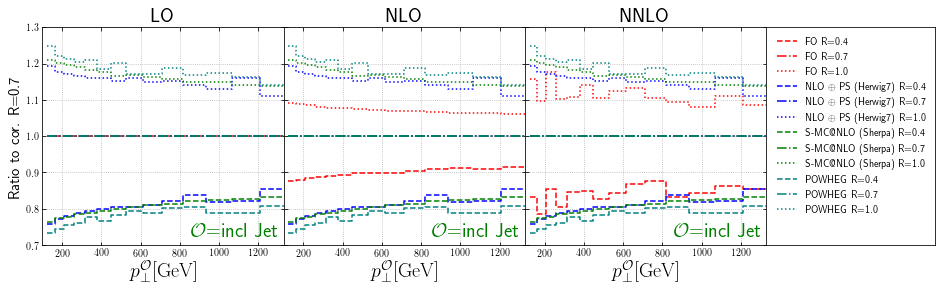

In [7]:
#This needs to be set by user:
ratiotoleadPT =np.array(NNLOJET_NLO['/CMS_RAD/d01-x01-y01-AK%s'%10].yVals()[:50])
ratioToR07=True
ratiototext="Ratio to cor. R=0.7"
savefig="Fig_V_18_inclJet.pdf"
multiplots([],ratiotoleadPT,[],ratiototext,savefig)